<b> Clustering Analysis

In [26]:
from clustering_functions import *
from sklearn.metrics import silhouette_score
from pre_processing_functions import preprocess
from pre_processing_functions import preprocess_semscalling
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [12]:
df= clustering('customer_info.csv')

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 2.1962801913295817


In [13]:
df

,customer_id,customer_name,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,customer_educlevel,som_cluster,Kmeans_cluster,hierarchical_cluster
0,0.857433,April Clark,1.005802,0.630498,1.397496,0.222470,0.696974,-0.746485,0.522647,-0.041676,-0.020749,1.722306,0.645623,1.283549,1.653328,-0.528767,0.045856,0.731036,2.001266,-0.592996,0.723919,-1.473453,-1.210310,1.280858,-0.070294,-0.723919,None,"(2, 1)",7,0
1,-1.143473,Paul Ketchum,-0.994231,-0.905273,0.068770,-1.091753,0.696974,-0.702608,-1.013591,0.175439,0.077044,-1.336103,-1.247725,-0.322975,-0.737103,-0.659575,-1.005829,-0.613579,-0.703009,2.884929,-0.331683,0.678678,-0.613011,-0.272739,1.494428,0.331683,Bsc.,"(0, 1)",2,4
2,1.681529,Mary Downing,1.005802,0.630498,2.726221,-1.091753,2.650070,-0.349564,0.156665,0.175439,1.252036,1.786319,1.770706,0.768037,1.772232,0.432567,-0.194440,-0.839900,1.422396,-0.778881,-0.753924,-1.473453,1.823423,0.400078,-1.020305,0.753924,None,"(2, 1)",1,0
3,0.132703,Manuel Kueny,-0.994231,-0.905273,-1.259955,0.222470,-1.256123,-0.459509,3.493829,0.175439,-1.054979,-0.742202,1.741682,0.048194,-0.059196,-1.189035,0.879090,-0.320693,0.575690,-0.263788,-1.176165,-1.473453,-0.281021,-0.116035,-0.293826,1.176165,None,"(1, 0)",5,8
4,-0.312366,Curtis Tharp,-0.994231,-0.137388,0.068770,0.222470,1.348006,1.359034,-0.140867,0.175439,-0.714187,0.883022,-0.491410,0.130676,1.032558,0.694183,-0.890362,-1.159413,0.774406,-0.075508,-0.542804,0.678678,1.767444,0.312405,0.265003,0.542804,Phd.,"(1, 1)",8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,1.475526,Mary Diaz,1.005802,-0.137388,0.068770,-1.091753,-0.605091,2.022820,0.425769,0.609668,0.108160,0.178877,1.176580,-0.424203,1.333678,0.698335,-0.057128,-0.400571,0.074578,-0.581315,0.723919,-1.473453,0.136872,2.169138,-1.579134,-0.723919,None,"(2, 0)",6,1
34056,0.640352,John Gross,-0.994231,-0.137388,0.068770,-1.091753,0.045942,-0.325239,0.024460,-0.041676,-0.352651,0.961260,-0.240443,0.537462,-0.394289,0.492780,-0.419132,0.005476,1.940787,0.888538,0.935039,0.678678,-0.132179,-0.503135,-0.740890,-0.935039,None,"(1, 1)",8,3
34057,1.689232,Kathleen Harper,1.005802,-0.137388,-1.259955,0.222470,-0.605091,-0.399027,1.401167,0.826783,-0.500821,-0.767096,-0.598967,-0.757880,1.001673,-0.713559,1.269181,-1.385734,0.636169,0.632977,0.723919,-1.473453,0.927389,-0.633962,-1.635017,-0.723919,None,"(1, 0)",5,8
34058,-0.143409,Jenny Landry,1.005802,-0.137388,0.068770,0.222470,0.696974,0.758270,0.274519,-0.910135,-0.807534,0.025956,-0.540921,0.595574,0.124564,0.781388,0.011528,0.384897,-0.029100,0.305715,0.090558,0.678678,-0.715458,0.028906,0.544418,-0.090558,Msc.,"(1, 1)",8,3


Text(0.5, 1.0, 'K-means Clustering')

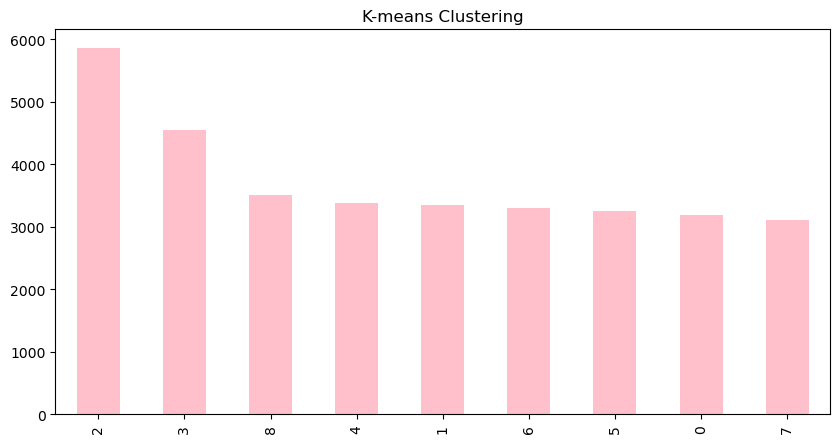

In [32]:
df['Kmeans_cluster'].value_counts().plot(kind='bar', figsize=(10, 5), color='pink')
plt.title('K-means Clustering')

Text(0.5, 1.0, 'Hierarchical Clustering')

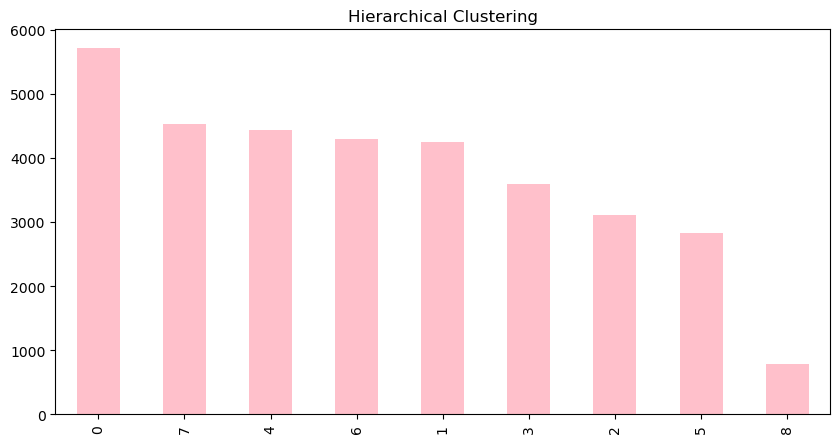

In [31]:
df['hierarchical_cluster'].value_counts().plot(kind='bar', figsize=(10, 5), color='pink')
plt.title('Hierarchical Clustering')

Text(0.5, 1.0, 'Self Organizing Map Clustering')

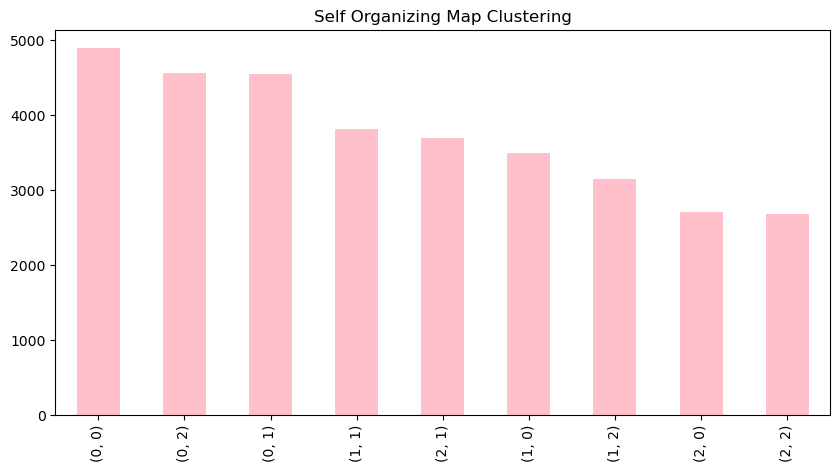

In [30]:
df['som_cluster'].value_counts().plot(kind='bar', figsize=(10, 5), color='pink')
plt.title('Self Organizing Map Clustering')

In [9]:
data = preprocess_semscalling('customer_info.csv')
data['kmeans_cluster'] = df['Kmeans_cluster']   
data['som_cluster'] = df['som_cluster']     
data['hierarchical_cluster'] = df['hierachical_cluster']    

In [28]:
def calcular_silhouettes(X, dicionario_labels):
    for nome, labels in dicionario_labels.items():
        if len(set(labels)) > 1:
            try:
                score = silhouette_score(X, labels)
                print(f"{nome}: Silhouette Score = {score:.3f}")
            except Exception as e:
                print(f"{nome}: Erro ao calcular o silhouette score → {e}")
        else:
            print(f"{nome}: apenas um cluster encontrado (não é possível calcular o silhouette score)")

In [25]:
label_dict = {
    "KMeans": df['Kmeans_cluster'].values,
    "SOM": df['som_cluster'].values,
    "Hierarchical": df['hierachical_cluster'].values
}

data = df[['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products']]
scores = calcular_silhouettes(data, label_dict)


KMeans: Silhouette Score = 0.195
SOM: Erro ao calcular o silhouette score → unhashable type: 'numpy.ndarray'
Hierarchical: Silhouette Score = 0.163


In [26]:
import umap
import numpy as np

# Reduzir para 2 dimensões
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_2d.fit_transform(data)

/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [27]:
scores_umap = calcular_silhouettes(X_umap, label_dict)

KMeans: Silhouette Score = 0.402
SOM: Erro ao calcular o silhouette score → unhashable type: 'numpy.ndarray'
Hierarchical: Silhouette Score = 0.437


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(df, feature_cols, cluster_col):
    X = df[feature_cols].values
    labels = df[cluster_col].values
    n_clusters = len(np.unique(labels))

    silhouette_vals = silhouette_samples(X, labels)
    silhouette_avg = silhouette_score(X, labels)

    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10

    for i in np.unique(labels):
        ith_cluster_vals = silhouette_vals[labels == i]
        ith_cluster_vals.sort()

        size_cluster_i = ith_cluster_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Coeficiente de Silhueta")
    ax.set_ylabel("Label do Cluster")
    ax.set_title(f"Silhouette Plot - {cluster_col}")
    plt.show()

In [10]:
data

,customer_id,customer_name,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,customer_educlevel,kmeans_cluster,som_cluster,hierarchical_cluster
0,29930.0,April Clark,1.0,2.0,2.0,1.0,4.0,7789.0,5601.0,13.0,...,2018.0,0.0,38.721807,-9.125534,53.0,7.0,None,3,"(0, 0)",2
1,6813.0,Paul Ketchum,0.0,0.0,1.0,0.0,4.0,8653.0,35.0,14.0,...,2013.0,1.0,38.734668,-9.163533,81.0,12.0,Bsc.,6,"(2, 1)",6
2,39451.0,Mary Downing,1.0,2.0,3.0,0.0,7.0,15605.0,4275.0,14.0,...,2011.0,0.0,38.787126,-9.147077,36.0,14.0,None,5,"(0, 0)",2
3,21557.0,Manuel Kueny,0.0,0.0,0.0,1.0,1.0,13440.0,16366.0,14.0,...,2009.0,0.0,38.741816,-9.159700,49.0,16.0,None,0,"(0, 2)",5
4,16415.0,Curtis Tharp,0.0,1.0,1.0,1.0,5.0,49250.0,3197.0,14.0,...,2012.0,1.0,38.785921,-9.149221,59.0,13.0,Phd.,1,"(1, 0)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,37071.0,Mary Diaz,1.0,1.0,1.0,0.0,2.0,62321.0,5250.0,16.0,...,2018.0,0.0,38.750813,-9.103808,26.0,7.0,None,7,"(0, 1)",4
34056,27422.0,John Gross,0.0,1.0,1.0,0.0,3.0,16084.0,3796.0,13.0,...,2019.0,1.0,38.745020,-9.169168,41.0,6.0,None,1,"(1, 0)",1
34057,39540.0,Kathleen Harper,1.0,1.0,0.0,1.0,2.0,14631.0,8784.0,17.0,...,2018.0,0.0,38.767834,-9.172368,25.0,7.0,None,0,"(0, 2)",5
34058,18367.0,Jenny Landry,1.0,1.0,1.0,1.0,4.0,37420.0,4702.0,9.0,...,2015.0,1.0,38.732462,-9.156155,64.0,10.0,Msc.,1,"(1, 2)",1


In [16]:
data.groupby('kmeans_cluster').mean(numeric_only=True)

,customer_id,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,hierarchical_cluster
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,19932.298036,0.505832,0.260712,0.291958,0.932842,1.381768,22249.964088,10942.453039,15.654942,214.625844,520.707182,1018.053898,894.942603,870.569982,284.906691,1126.809085,301.053407,115.484653,28.217978,2017.062308,0.468386,38.748017,-9.169661,56.292634,7.937692,5.088398
1,20083.970630,0.484745,0.959395,0.802908,0.957514,3.095637,28985.078985,3834.643855,13.745081,386.370174,587.155118,694.516111,987.229541,968.819618,656.375820,393.561449,328.693185,229.244083,39.241801,2013.572854,0.680354,38.747764,-9.157260,57.728087,11.427146,3.650128
2,20198.922628,0.494057,1.224804,0.834582,1.302220,2.625163,10341.357479,898.489123,11.763624,268.441848,192.847275,567.794393,569.703072,404.575241,383.193541,161.905360,250.696793,55.344472,56.932910,2017.969276,0.524333,38.745519,-9.156571,31.997668,7.030724,0.895492
3,19838.256460,0.498385,2.516021,1.759044,0.695478,2.930103,20180.420866,5002.034884,10.397610,853.628165,722.351744,1499.979845,1494.519057,1382.187209,861.543605,444.530685,527.255814,265.054264,18.832403,2013.078488,0.721576,38.748549,-9.154966,57.178359,11.921512,2.661176
4,20300.247803,0.489675,0.997100,0.305053,0.719903,3.161819,10559.988137,1983.849297,13.887390,1995.597232,396.022408,396.504086,54.268893,77.810281,704.785808,199.460457,246.162346,80.447056,10.334141,2014.631810,0.600835,38.747606,-9.156566,56.177065,10.368190,3.018234
5,19755.079508,0.498650,2.869427,1.894149,0.794419,3.009301,20065.552955,5003.437144,10.211881,845.164116,794.182718,1552.350435,1525.735374,1338.188599,891.159616,410.122112,217.985899,301.967597,19.780071,2012.892589,0.697570,38.748015,-9.156383,56.573837,12.107411,2.183318
6,19965.336767,0.501577,0.551104,0.971705,0.858146,3.833593,10704.255834,547.137061,14.727643,470.193399,167.345386,178.273155,820.667227,351.075047,428.849275,189.893420,316.450284,52.993483,66.660528,2014.638007,0.865882,38.747570,-9.157761,63.592096,10.361993,5.867353
7,19992.906570,0.505726,0.532369,0.978059,0.093791,2.095359,61713.006631,5109.671489,14.563110,1111.449247,490.044304,1481.882942,1379.315853,1717.614165,851.451477,595.778481,389.699819,146.107896,12.129820,2013.766727,0.785413,38.751634,-9.146159,56.377517,11.233273,6.301085
8,19993.096497,0.498156,1.099631,1.012477,0.977935,3.837984,30966.528580,3217.098341,13.182176,336.759988,705.463737,714.003503,1004.374616,955.437246,1602.735403,313.058697,350.492010,251.830363,40.436282,2012.272588,0.826675,38.747196,-9.156324,55.341610,12.727412,1.336202


In [17]:
data.groupby('hierarchical_cluster').mean(numeric_only=True)

,customer_id,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,kmeans_cluster
hierarchical_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,20105.090517,0.492140,1.310091,0.841734,1.370994,2.495081,10118.279412,881.824544,11.475963,242.201927,195.150862,607.394878,540.149594,404.155680,377.152383,151.548428,238.773327,54.286004,55.947580,2017.910751,0.494929,38.745160,-9.156531,32.350761,7.089249,2.163793
1,19912.046714,0.492417,1.110698,1.014034,0.976421,3.778038,30693.500101,3186.683923,12.535288,334.766714,694.863903,706.971527,1010.658645,947.726633,1265.704550,318.085945,350.701112,250.838625,40.034652,2012.393327,0.815369,38.747284,-9.156491,55.372781,12.606673,5.392922
2,19783.435503,0.496342,2.994032,1.946477,0.840970,3.097767,20055.011937,4970.890836,10.141972,815.876781,802.673662,1533.157451,1510.870812,1310.236889,897.088756,401.201579,346.350019,311.609164,20.407369,2012.798229,0.696188,38.747585,-9.157129,57.154293,12.201771,4.154987
3,20314.573481,0.489282,1.000398,0.301569,0.719558,3.164066,10553.444199,1985.454144,13.896796,1996.765923,397.009282,397.084552,50.562652,76.147271,705.058564,199.020331,245.846851,80.492155,10.073560,2014.625414,0.600000,38.747600,-9.156564,56.169326,10.374586,4.000000
4,19985.629250,0.496161,0.954223,1.130018,0.230420,2.277514,33079.009506,5133.991590,13.776746,1072.913492,518.674589,1475.458062,1398.478245,1598.838391,819.962340,571.046435,414.578428,156.783912,13.429004,2013.908958,0.766362,38.750920,-9.148227,53.377916,11.091042,5.038391
5,19950.049345,0.504417,0.264149,0.294730,0.931648,1.382638,22331.508681,10646.502589,15.588242,210.343893,527.348157,1015.987694,895.496497,870.404935,287.001218,1119.917758,294.844959,119.143162,28.339840,2017.080719,0.467256,38.748038,-9.169523,56.935425,7.919281,0.130673
6,20042.717419,0.503133,0.521220,0.985255,0.716207,4.004720,10123.329574,420.355054,14.707435,478.184252,151.593358,152.178028,804.148496,302.867586,413.529031,183.807644,321.559106,51.143066,69.734551,2015.030702,0.891813,38.747532,-9.156713,59.854261,9.969298,5.513576
7,20262.933272,0.501390,0.824930,0.588230,1.249954,2.441427,26982.771548,4395.144115,15.505653,439.440315,459.878591,606.431140,954.950880,975.206209,662.515292,412.981464,316.673309,178.540778,40.540275,2014.677016,0.549583,38.748420,-9.160082,59.290361,10.322984,2.550973
8,19975.972987,0.508665,0.532008,0.991131,0.092966,2.086646,71374.930683,4991.282875,13.677064,1054.404179,499.388379,1496.254944,1399.686544,1730.006728,853.330275,590.428135,386.118756,147.421509,11.351863,2013.399592,0.794088,38.751799,-9.146116,60.963405,11.600408,6.824669


In [18]:
data.groupby('som_cluster').mean(numeric_only=True)

,customer_id,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,kmeans_cluster,hierarchical_cluster
som_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(0, 0)",19854.611996,0.480176,2.797357,1.864859,0.779058,3.001627,22298.760420,4974.291427,10.423246,960.779939,814.413080,1585.844663,1575.199593,1483.188004,839.668926,412.044392,259.365978,310.318536,19.191009,2013.316503,0.699085,38.747791,-9.156000,52.240935,11.683497,4.710268,2.312098
"(0, 1)",19833.368772,0.513142,0.527972,0.978972,0.098313,2.095410,69003.898784,5101.787368,14.261671,1110.277756,499.209494,1478.983131,1385.963907,1757.556454,865.552766,597.548058,379.927815,146.118870,12.109307,2013.625736,0.794821,38.751493,-9.146201,58.087485,11.374264,6.945861,6.747352
"(0, 2)",19946.104564,0.503177,0.277354,0.301271,0.890468,1.408781,23186.613518,10842.231947,15.839977,247.268746,517.203351,1012.006817,904.904968,885.472155,310.951473,1088.911323,303.001444,118.691219,28.331390,2017.017331,0.472270,38.748127,-9.168469,55.240497,7.982669,0.253033,5.117562
"(1, 0)",20075.407562,0.492461,1.153421,1.046764,0.975922,3.799304,31137.780329,3201.509627,13.964045,347.383020,739.349339,727.771932,1010.541638,948.915333,1410.436326,314.916957,353.922292,252.075852,39.723576,2012.286244,0.819068,38.747432,-9.156278,54.823289,12.713756,6.126885,1.825099
"(1, 1)",19901.120401,0.496199,1.995379,1.509638,0.587717,2.785041,23846.477349,4866.797507,11.273943,836.383825,621.864092,1465.344603,1406.420189,1346.822925,860.510490,472.536333,537.295531,231.760413,19.295982,2013.469444,0.726969,38.749251,-9.153636,55.032593,11.530556,3.535117,3.134995
"(1, 2)",19972.281357,0.502742,1.570459,1.160452,0.889925,2.937080,22756.161412,4420.515079,11.194928,482.829746,591.323509,939.046539,1164.352981,1064.259082,719.578136,427.635367,253.183687,247.391021,32.089810,2013.010624,0.668609,38.747783,-9.156861,65.657025,11.989376,2.763879,2.994859
"(2, 0)",20295.644948,0.489544,0.998415,0.307638,0.720757,3.162492,10576.788906,1989.468413,13.842395,1995.761699,396.222320,397.233898,56.163989,78.477042,706.583095,199.892582,245.342725,80.679947,10.397933,2014.638125,0.601365,38.747617,-9.156541,56.078142,10.361875,3.999120,3.020471
"(2, 1)",20004.429243,0.501382,0.588723,0.929961,0.920011,3.678386,11895.842178,722.577114,15.751520,477.244002,191.587065,216.527363,813.677722,390.163405,435.091763,202.522941,382.510227,60.199005,63.335075,2014.754008,0.832504,38.747520,-9.158436,63.831951,10.245992,5.459646,5.927861
"(2, 2)",20095.352113,0.499406,1.050263,0.870626,1.168335,2.948345,10521.573222,804.982861,11.981707,312.764704,186.922281,467.836009,633.548617,389.135720,391.961480,172.050568,230.224504,54.690480,59.953353,2017.066011,0.613949,38.746172,-9.156596,39.262481,7.933989,3.033939,2.030714
